In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import networkx as nx
from networkx.algorithms import bipartite
from networkx.drawing.layout import bipartite_layout
import seaborn as sns

In [ ]:
from networkx.drawing.nx_agraph import to_agraph
import graphviz

In [ ]:
# !apt install libgraphviz-dev
# !pip install pygraphviz

# **Pre-processing**
This section initializes the dataframe storing all the senator-donor data

In [ ]:
# get all data
df = pd.read_csv('https://raw.githubusercontent.com/Justin-Pascua/MATH-168-Group-Project/refs/heads/main/full_opensecrets_data.csv')

# filter down to top x-donors, where 0 <= x <= 100
x = 100
df = df.groupby('Senator').head(x).reset_index(drop = True)
df

,Senator,Party,Organization,Total,PACs,Individuals
0,"Baldwin, Tammy",(D),University of Wisconsin,528258,0,528258
1,"Baldwin, Tammy",(D),JStreetPAC,216748,9706,207042
2,"Baldwin, Tammy",(D),Democracy Engine,187684,0,187684
3,"Baldwin, Tammy",(D),League of Conservation Voters,97896,12213,85683
4,"Baldwin, Tammy",(D),State of Wisconsin,91576,0,91576
...,...,...,...,...,...,...
9995,"Young, Todd",(R),Hilton Worldwide,26825,2500,24325
9996,"Young, Todd",(R),Mulzer Crushed Stone,26750,0,26750
9997,"Young, Todd",(R),Pilot Corp,26700,0,26700
9998,"Young, Todd",(R),North American Midway Entertainment,26600,0,26600


In [ ]:
# Maps senator name to party string
senator_to_party = dict(zip(df['Senator'].unique(), df['Party'][::x]))

# Maps senator index to party string
index_to_party = dict(zip(range(100), df['Party'][::x]))

# Mapping encoding party labels into numerical indices
party_to_num = {'(D)': 0, '(I)': 1, '(R)': 2}

# Mapping for decoding numerical indices into party labels
num_to_party = {0: '(D)', 1: '(I)', 2: '(R)'}

In [ ]:
# compute normalized contributions (i.e. normalize donation amounts so that weighted degree of each senator is 1)

# initialize normalized columns
df['Portion of Total'] = 0.0
df['Portion of PACs'] = 0.0
df['Portion of Individuals'] = 0.0

# get unique names
senators = df['Senator'].unique()
donors = df['Organization'].unique()

for senator in senators:
  # get entries corresponding to fixed senator
  temp_df = df[df['Senator'] == senator].copy()

  # compute totals for PACs, Individuals, and Total column
  pacs_total = temp_df['PACs'].sum()
  individuals_total = temp_df['Individuals'].sum()
  combined_total = pacs_total + individuals_total

  # divide each entry with corresponding total
  df.loc[df['Senator'] == senator, 'Portion of Total'] = temp_df['Total']/combined_total
  df.loc[df['Senator'] == senator, 'Portion of PACs'] = temp_df['Individuals']/individuals_total
  df.loc[df['Senator'] == senator, 'Portion of Individuals'] = temp_df['PACs']/pacs_total

df

,Senator,Party,Organization,Total,PACs,Individuals,Portion of Total,Portion of PACs,Portion of Individuals
0,"Baldwin, Tammy",(D),University of Wisconsin,528258,0,528258,0.132522,0.188420,0.000000
1,"Baldwin, Tammy",(D),JStreetPAC,216748,9706,207042,0.054375,0.073848,0.008207
2,"Baldwin, Tammy",(D),Democracy Engine,187684,0,187684,0.047083,0.066943,0.000000
3,"Baldwin, Tammy",(D),League of Conservation Voters,97896,12213,85683,0.024559,0.030562,0.010327
4,"Baldwin, Tammy",(D),State of Wisconsin,91576,0,91576,0.022973,0.032664,0.000000
...,...,...,...,...,...,...,...,...,...
9995,"Young, Todd",(R),Hilton Worldwide,26825,2500,24325,0.006222,0.007077,0.002861
9996,"Young, Todd",(R),Mulzer Crushed Stone,26750,0,26750,0.006205,0.007782,0.000000
9997,"Young, Todd",(R),Pilot Corp,26700,0,26700,0.006193,0.007768,0.000000
9998,"Young, Todd",(R),North American Midway Entertainment,26600,0,26600,0.006170,0.007739,0.000000


In [ ]:
totals = []
for senator in senators:
  total = df[df['Senator'] == senator]['Total'].sum()
  print(f'{senator}: {total}')
  totals.append(total)

Baldwin, Tammy: 3986200
Barrasso, John A: 3461555
Bennet, Michael: 4309747
Blackburn, Marsha: 2982183
Blumenthal, Richard: 2722982
Blunt, Roy: 4400162
Booker, Cory: 3037886
Boozman, John: 2123973
Braun, Mike: 1796643
Brown, Sherrod: 4935375
Burr, Richard: 3531897
Cantwell, Maria: 1837798
Capito, Shelley Moore: 2314471
Cardin, Ben: 1850035
Carper, Tom: 2727776
Casey, Bob: 5500437
Cassidy, Bill: 3338475
Collins, Susan: 2979436
Coons, Chris: 3133117
Cornyn, John: 4964870
Cotton, Tom: 2921391
Cramer, Kevin: 1514468
Crapo, Mike: 4030182
Cruz, Ted: 4728813
Daines, Steven: 3556214
Duckworth, Tammy: 3268967
Durbin, Dick: 3891994
Ernst, Joni: 3661273
Feinstein, Dianne: 2554497
Fischer, Deb: 2669380
Gillibrand, Kirsten: 4184892
Graham, Lindsey: 3713578
Grassley, Chuck: 2887301
Hagerty, Bill: 2825266
Harris, Kamala: 3803936
Hassan, Maggie: 3351674
Hawley, Josh: 2476909
Heinrich, Martin: 2925416
Hickenlooper, John: 4594002
Hirono, Mazie K: 1941900
Hoeven, John: 1939094
Hollen, Chris Van: 3269409
H

In [ ]:
min(totals), max(totals)

(np.int64(1043928), np.int64(12195623))

In [ ]:
# get donors of a specified politician
def get_donors(senator):
  temp = df[df['Senator'] == senator]
  temp_donors = set(temp['Organization'])
  return temp_donors

# get donees of specified donors
def get_donees(org):
  temp = df[df['Organization'] == org]
  temp_donees = set(temp['Senator'])
  return temp_donees

# **Graph Construction**
This section is used to construct the networkx objects for the bipartite network and the two projections

In [ ]:
def construct_network(weight_by = 'Portion of Total'):
  # initialize graph
  bip_graph = nx.Graph()

  # add nodes for donors
  bip_graph.add_nodes_from(df['Organization'], bipartite = 0)

  # add nodes for senators
  bip_graph.add_nodes_from(df['Senator'], bipartite = 1)

  # get edges from df, weighted by normalized contributions
  edges = [(df['Organization'][i], df['Senator'][i], {'weight': df[weight_by][i]}) for i in range(len(df))]

  # add edges to graph
  bip_graph.add_edges_from(edges)

  row_nodes = list(df['Organization'].unique())
  col_nodes = list(df['Senator'].unique())

  # Get incidence matrix
  inc_matrix = nx.bipartite.biadjacency_matrix(bip_graph, row_nodes, col_nodes)

  # Get weighted adjacency matrices using incidence matrix
  senator_proj_matrix = inc_matrix.T @ inc_matrix
  donor_proj_matrix = inc_matrix @ inc_matrix.T

  # Convert into arrays
  senator_proj_matrix = senator_proj_matrix.toarray()
  donor_proj_matrix = donor_proj_matrix.toarray()

  # Create projections using adjacency matrices
  senator_network = nx.from_numpy_array(senator_proj_matrix)
  donor_network = nx.from_numpy_array(donor_proj_matrix)

  # Add weighted degree to attributes of each node
  for i in range(100):
    senator_network.nodes[i]['Weighted Degree'] = senator_proj_matrix[i].sum()
    senator_network.nodes[i]['Party'] = index_to_party[i]
    senator_network.nodes[i]['Party Num'] = party_to_num[senator_network.nodes[i]['Party']]
  for i in range(len(donors)):
    donor_network.nodes[i]['Weighted Degree'] = donor_proj_matrix[i].sum()

  return bip_graph, senator_proj_matrix, donor_proj_matrix, senator_network, donor_network

In [ ]:
bip_graph, senator_proj_matrix, donor_proj_matrix, senator_network, donor_network = construct_network()

# **Identifying Edges of Highest Weight**
This section is used to identify which edges in the senator projection have the highest weights

In [ ]:
def get_common_donors(name1, name2):
  donor_set1 = get_donors(name1)
  donor_set2 = get_donors(name2)

  common_donors = donor_set1 & donor_set2
  return common_donors

In [ ]:
# List senator pairs from highest to lowest edge weight
edge_weights_df = pd.DataFrame(columns = ["Senator Pair", "Edge Weight"], index = range(4950))

# Iterate over all unordered pairs of senators
n = 0
for i in range(100):
  for j in range(i):
    # Record names of senators in pari
    edge_weights_df.iloc[n, 0] = f"{senators[i]} and {senators[j]}"
    try:
      # If edge exists, record weight
      edge_weights_df.iloc[n, 1] = senator_network.edges[(i,j)]['weight']
    except:
      # Otherwise, nothing
      pass
    n += 1

# Sort by weight
edge_weights_df.sort_values('Edge Weight', ascending = False, inplace = True)

# Drop any pairs not connected by an edge
edge_weights_df.dropna(inplace = True)

# Reset indices
edge_weights_df.reset_index(inplace = True, drop = True)

edge_weights_df

,Senator Pair,Edge Weight
0,"Masto, Catherine Cortez and Duckworth, Tammy",0.030583
1,"Rosen, Jacky and Masto, Catherine Cortez",0.030409
2,"Rosen, Jacky and Duckworth, Tammy",0.024096
3,"Lummis, Cynthia and Hawley, Josh",0.023394
4,"Sinema, Kyrsten and Rosen, Jacky",0.021244
...,...,...
4933,"Tuberville, Tommy and Masto, Catherine Cortez",0.000044
4934,"Warren, Elizabeth and Marshall, Roger",0.000044
4935,"Markey, Ed and Kennedy, John",0.00004
4936,"Johnson, Ron and Cantwell, Maria",0.000037


In [ ]:
greatest_pair = edge_weights_df['Senator Pair'][0].split(' and ')
get_common_donors(greatest_pair[0], greatest_pair[1])

{'AT&T Inc',
 'Air Line Pilots Assn',
 'Akin, Gump et al',
 'American Assn for Justice',
 'Bend The Arc Jewish Action',
 'Berkshire Hathaway',
 'Blue Cross/Blue Shield',
 'Charter Communications',
 'Cigna Corp',
 'Clifford Law Offices',
 'Comcast Corp',
 'Cooney & Conway',
 'Council for a Livable World',
 'Deloitte LLP',
 'Democratic Senatorial Campaign Cmte',
 "EMILY's List",
 'Great Lakes PAC',
 'Honeywell International',
 'International Brotherhood of Electrical Workers',
 'Ironworkers Union',
 'JStreetPAC',
 'League of Conservation Voters',
 'Motley Rice LLC',
 'NCTA The Internet & Television Assn',
 'National Air Traffic Controllers Assn',
 'Northrop Grumman',
 'Pfizer Inc',
 'Sheet Metal, Air, Rail & Transportation Union',
 'Thornton Law Firm',
 'Transport Workers Union',
 'UNITE HERE',
 'United Food & Commercial Workers Union',
 'UnitedHealth Group',
 'University of California',
 'Womencount PAC'}

In [ ]:
least_pair = edge_weights_df['Senator Pair'][len(edge_weights_df)-1].split(' and ')
get_common_donors(least_pair[0], least_pair[1])

{'Home Depot'}

# **Distribution of Normalized Contributions (i.e. edge weight distributions of bipartite graph)**

For each senator, we plot the distribution of donations. More precisely, for each fixed senator, we plot the distribution p(k), where p(k) is the percentage of the senator's campaign funds accounted for by the donation of the k-th top donor. This is just given by the "Portion of Total" column in the dataframe df

In [ ]:
import seaborn as sns

In [ ]:
distributions = []
for i in range(100):
  distributions.append(df[df['Senator'] == senators[i]]['Portion of Total'].values)

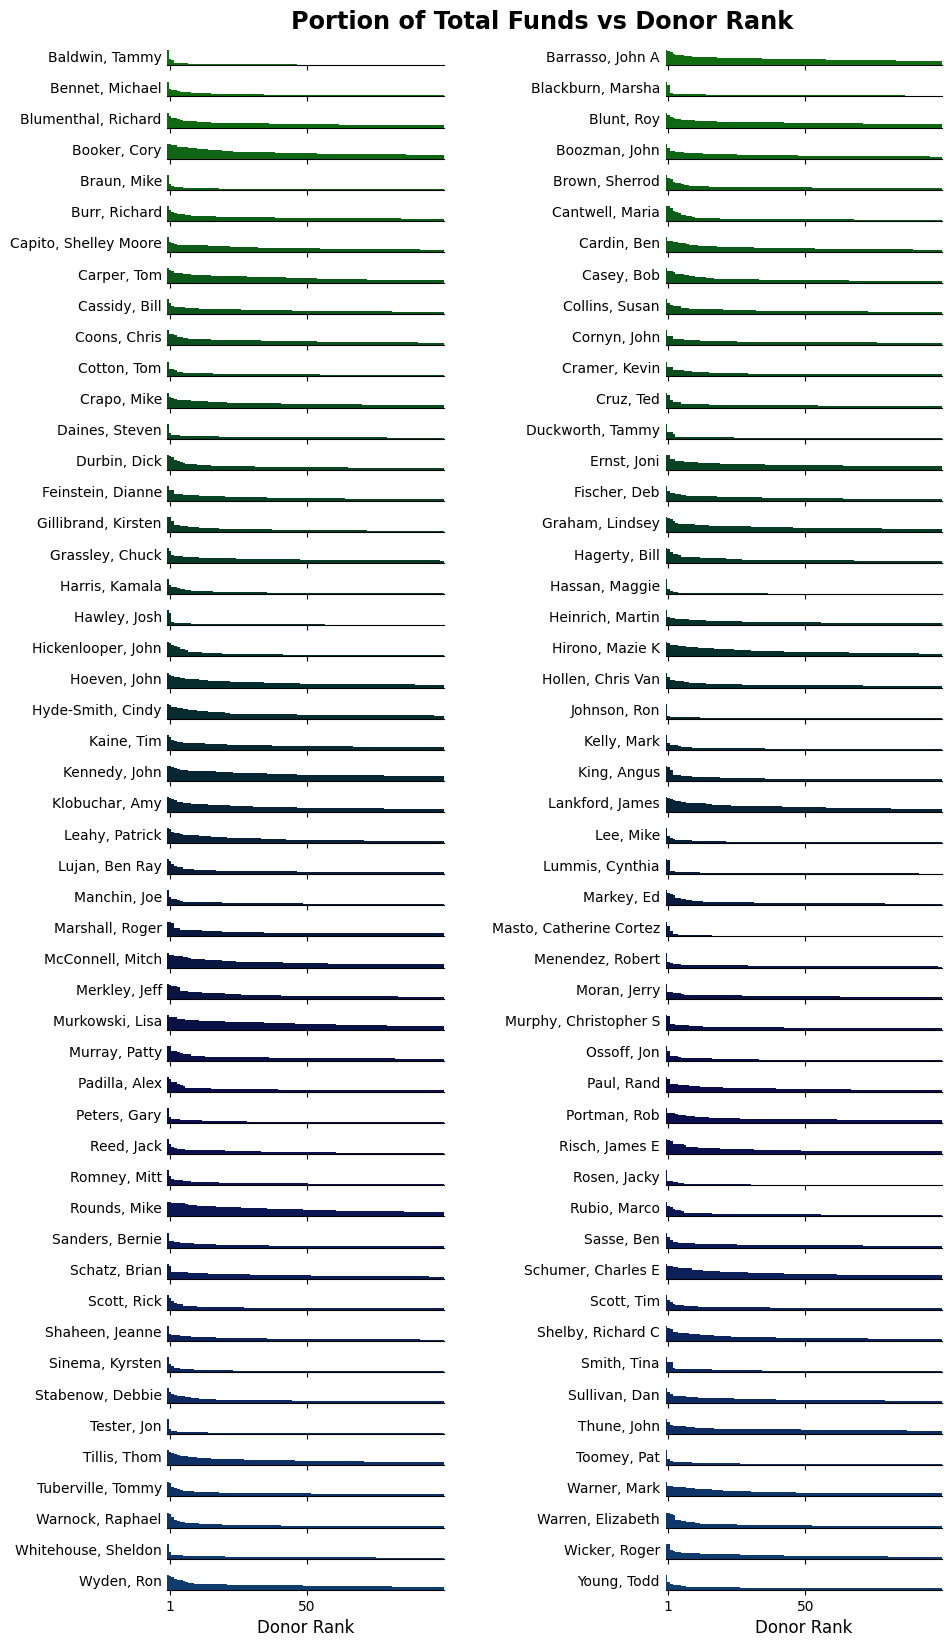

In [ ]:
temp_df = pd.DataFrame(distributions).melt(var_name='Donor Rank', value_name='Portion of Total')
temp_df['Distribution'] = np.tile(range(100), x)

fig, axes = plt.subplots(50, 2, figsize=(10, 20), sharex=True)
fig.subplots_adjust(hspace = 1, wspace = 0.8)
axes = axes.flatten()

for i, ax in enumerate(axes):
    sns.barplot(
        data = temp_df[temp_df['Distribution'] == i],
        x = 'Donor Rank',
        y = 'Portion of Total',
        ax = ax,
        color= plt.cm.ocean(i/200),
        width = 1,
#        edgecolor='.01'
    )
    ax.set_ylabel(f'{senators[i]}', rotation=0, ha='right', va='center')
    ax.set_xlabel('Donor Rank', size='large')
    ax.set_xticks([1, 50, 100])
    ax.set_yticks([])
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

plt.xlim(0, x-1)
plt.suptitle('Portion of Total Funds vs Donor Rank', y=0.9, size='xx-large', fontweight='extra bold')
plt.savefig('Math168_Bipartite_Weight_Dist.png')
plt.show()


# **Community Detection (Senators)**

In [ ]:
def modularity(G, z):
  """
    Computes modularity of graph wrt community assignment vector z
    Parameters:
      G: a networkx graph
      z: a numpy array of shape (len(G.nodes), )
  """
  # get weighted adjacency matrix
  A = nx.to_numpy_array(G)

  # compute m, the weighted sum of edges
  m = np.sum(A)/2

  # store degrees in an array
  k = np.array([G.nodes[i]['Weighted Degree'] for i in range(len(G.nodes))])

  # define modularity matrix divided by 2m
  M = (A - np.outer(k,k)/(2*m))/(2*m)

  # define matrix whose ij'th component is delta_{g_i, g_j}
  k_delta = (z[:, None] == z[None,]).astype(int)

  # compute modularity
  return np.sum(M * k_delta)

In [ ]:
def community_list_to_arr(comm_list, mode = 'Senator'):
  """
    Converts list of dictionaries representing communnity assignments into
    a vector representing communtiy assignments
    Parameters:
      comm_list: a list of dictionaries
  """
  num_communities = len(comm_list)
  if mode == 'Senator':
    comm_arr = np.full(len(senators), 0)
  else:
    comm_arr = np.full(len(donors), 0)
  for k in range(num_communities):
    for i in comm_list[k]:
      comm_arr[i] = k
  return comm_arr

In [ ]:
def summarize_donors_from_community(community, mode = 'Total'):
  """
    Given a dictionary of senator indices, this returns a dataframe of organizations
    and the total amount each organization has contributed to senators in the community
  """
  # get set of senators in community
  senator_set = set([senators[i] for i in community])

  # filter df down to columns with senators in the community
  sub_df = df[df['Senator'].isin(senator_set)]

  # aggregate by getting total each donor has contributed
  summary = sub_df.groupby(by = 'Organization').aggregate({mode: 'sum'}).sort_values(by = mode, ascending = False)

  return summary

In [ ]:
def party_breakdown(community):
  """
    Given a dictionary of senator indices, this returns
    the number of democrats and republicans in the community
  """
  party_breakdown = {'(D)': 0, '(I)': 0, '(R)': 0}
  for i in community:
    party_breakdown[senator_to_party[senators[i]]] += 1
  return party_breakdown

In [ ]:
# get senator and party pairing from original df
party_df = df[['Senator', 'Party']].drop_duplicates()

# put community assignments into a vector
party_arr = np.vectorize(party_to_num.get)(party_df['Party'].values)

# put communnities in form of list of sets
party_communities = [set() for k in range(3)]
for i in range(100):
  party_communities[party_arr[i]].add(i)

In [ ]:
# compute modularity with respect to party
modularity(senator_network, party_arr)

np.float64(0.1622849336804305)

In [ ]:
# look for communities by optimizing weighted modularity
detected_senator_communities = nx.community.louvain_communities(senator_network, weight = 'weight')
for k in range(len(detected_senator_communities)):
  for i in senator_network.nodes:
    if i in detected_senator_communities[k]:
      senator_network.nodes[i]['Louvain Community Assignment'] = k

detected_senator_communities_arr = community_list_to_arr(detected_senator_communities)
detected_senator_clustering = nx.get_node_attributes(senator_network, 'Louvain Community Assignment')

# compute modularity with respect to detected communities
modularity(senator_network, detected_senator_communities_arr)

np.float64(0.20837211172369047)

Detected Clustering with Party Color

In [ ]:
red = (np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(1.0))
green = (np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))
blue = (np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(1.0))
party_colors = [blue, green, red]

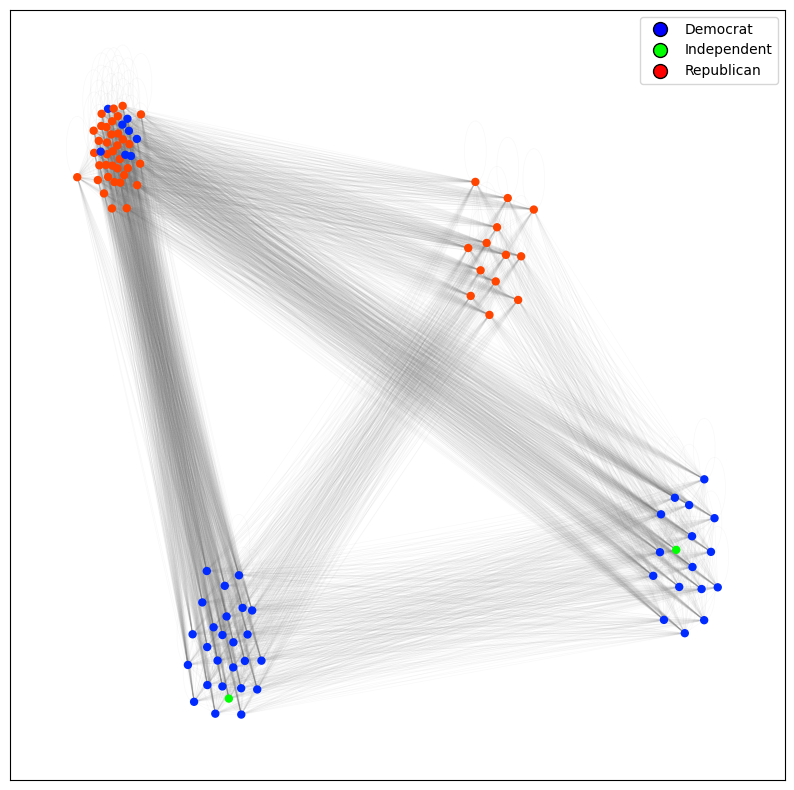

In [ ]:
# https://networkx.org/documentation/stable/auto_examples/drawing/plot_clusters.html

party_clustering = nx.get_node_attributes(senator_network, 'Party Num')

# create layout
supergraph = nx.cycle_graph(len(detected_senator_communities))
superpos = nx.spring_layout(senator_network, scale = 15)

centers = list(superpos.values())
pos = {}
for center, comm in zip(centers, detected_senator_communities):
  pos.update(nx.spring_layout(nx.subgraph(senator_network, comm), center = center))

# set up plot
fig, ax = plt.subplots(1,1, figsize=(10, 10))

node_kwargs = {"node_size" : 25}
num_clusters = np.unique(list(party_clustering.values())).shape[0]
cluster_to_color = ['#002aff', '#00ff00', '#ff4400']
classes = ['Democrat', 'Independent', 'Republican']
node_kwargs["node_color"] = [cluster_to_color[party_clustering[i]] for i in senator_network.nodes()]
edge_kwargs = {"edge_color" : "gray", "alpha" : 0.05}
nx.draw_networkx_edges(senator_network, pos, ax = ax, width = 0.5, **edge_kwargs)
nx.draw_networkx_nodes(senator_network, pos, ax = ax, alpha = 1, **node_kwargs)
# nx.draw_networkx_labels(senator_network, pos, ax = ax, alpha = 1,
#                        font_size = 10,
#                         labels = {n:index_to_party[n] for n in range(100)}
#                        )

legend_elements = [Line2D([0], [0], marker = 'o', color = "black",
                          label = classes[i], lw = 0,
                          markerfacecolor = party_colors[i], markersize=10) for i in range(3)]
ax.legend(handles = legend_elements, loc = 'upper right')

plt.savefig('Math168_Senator_Louvain_Clustering.png')
plt.show()

In [ ]:
# For each cluster, summarize donors
for i in range(len(detected_senator_communities)):
  community = detected_senator_communities[i]
  temp_df = summarize_donors_from_community(community, mode = 'Total')
  print(f'Community {i}:')
  print('Size:', len(community))
  print('Party Breakdown:', party_breakdown(community))
  print(temp_df[:10])
  print('='*50)

Community 0:
Size: 44
Party Breakdown: {'(D)': 8, '(I)': 0, '(R)': 36}
                           Total
Organization                    
Capital Group Companies  1741383
Berkshire Hathaway       1636784
Goldman Sachs            1620464
Comcast Corp             1542114
Blackstone Group         1493350
Northrop Grumman         1477135
Blue Cross/Blue Shield   1413489
Honeywell International  1410413
Lockheed Martin          1344816
Deloitte LLP             1313967
Community 1:
Size: 13
Party Breakdown: {'(D)': 0, '(I)': 0, '(R)': 13}
                                       Total
Organization                                
Club for Growth                      2953302
Senate Conservatives Fund            1645677
AT&T Inc                              427457
Comcast Corp                          423002
Berkshire Hathaway                    391437
National Republican Senatorial Cmte   373582
Elliott Management                    340000
Blackstone Group                      334956
Goldman Sach

# **Community Detection (Donors)**

In [ ]:
def summarize_parties_from_community(community, mode = 'Total'):
  """
    Given a dictionary of donor indices, this returns a dataframe of senators
    and the total amount received by each senator from donors in this community
  """
  # get set of senators in community
  donor_set = set([donors[i] for i in community])

  # filter df down to columns with donors in the community
  sub_df = df[df['Organization'].isin(donor_set)]

  # aggregate by getting total contributed to each party
  party_total_df = sub_df.groupby(by = 'Party').aggregate({mode: 'sum'}).sort_values(by = mode, ascending = False)

  # compute sum and normalize
  sum = party_total_df.sum()
  summary = party_total_df/sum

  return summary

In [ ]:
detected_donor_communities = nx.community.louvain_communities(donor_network, weight = 'weight')
for k in range(len(detected_donor_communities)):
  for i in donor_network.nodes:
    if i in detected_donor_communities[k]:
      donor_network.nodes[i]['Louvain Community Assignment'] = k

detected_donor_communities_arr = community_list_to_arr(detected_donor_communities, mode = 'Donors')
detected_donor_clustering = nx.get_node_attributes(donor_network, 'Louvain Community Assignment')

In [ ]:
# compute modularity with respect to detected communities
modularity(donor_network, detected_donor_communities_arr)

np.float64(0.2818980248121711)

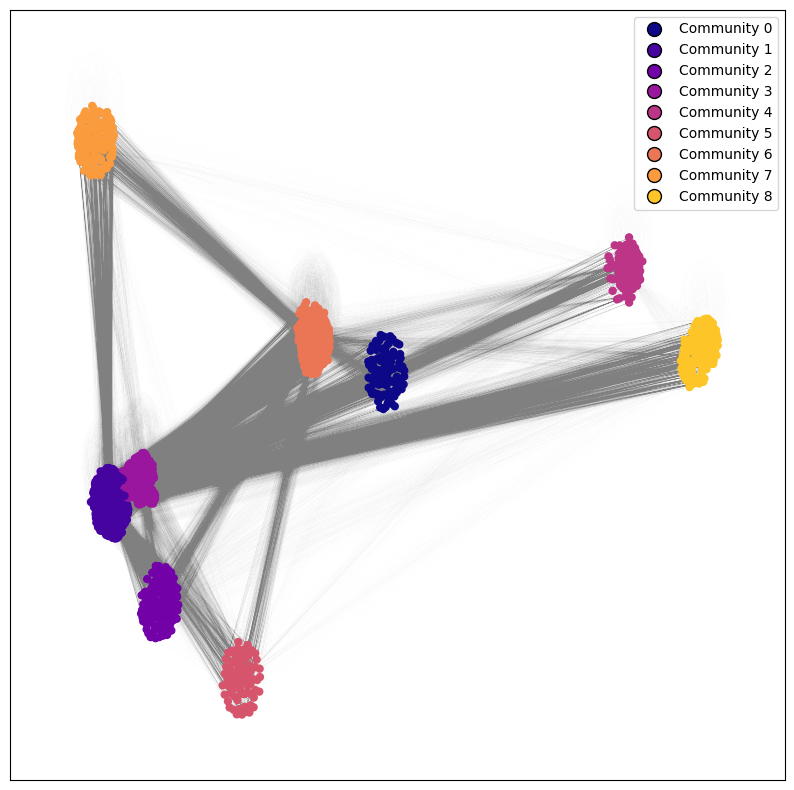

In [ ]:
# https://networkx.org/documentation/stable/auto_examples/drawing/plot_clusters.html

# create layout
supergraph = nx.cycle_graph(len(detected_donor_communities))
superpos = nx.spring_layout(donor_network, scale = 100)

centers = list(superpos.values())
pos = {}
for center, comm in zip(centers, detected_donor_communities):
  pos.update(nx.spring_layout(nx.subgraph(donor_network, comm), center = center))

# set up plot
fig, ax = plt.subplots(1,1, figsize=(10, 10))

node_kwargs = {"node_size" : 25}
num_clusters = np.unique(list(detected_donor_clustering.values())).shape[0]
cluster_to_color = [plt.cm.plasma(i*28) for i in range(num_clusters)]
node_kwargs["node_color"] = [cluster_to_color[detected_donor_clustering[i]] for i in donor_network.nodes()]
edge_kwargs = {"edge_color" : "gray", "alpha" : 0.00197}
nx.draw_networkx_edges(donor_network, pos, ax = ax, width = 0.5, **edge_kwargs)
nx.draw_networkx_nodes(donor_network, pos, ax = ax, **node_kwargs)

classes = [f'Community {i}' for i in range(len(detected_donor_communities))]
legend_elements = [Line2D([0], [0], marker='o', color="black", label=classes[i], lw=0, markerfacecolor=plt.cm.plasma(i*28), markersize=10) for i in range(len(detected_donor_communities))]
ax.legend(handles=legend_elements, loc='upper right')

plt.savefig('Math168_Donor_Louvain_Clustering.png')
plt.show()

In [ ]:
for i in range(len(detected_donor_communities)):
  community = detected_donor_communities[i]
  print(f'Community {i}:')
  print('Size:', len(community))
  temp_df = summarize_parties_from_community(community)
  print(temp_df)
  print('='*50)

Community 0:
Size: 94
          Total
Party          
(D)    0.809088
(R)    0.190912
Community 1:
Size: 814
          Total
Party          
(R)    0.607439
(D)    0.387144
(I)    0.005417
Community 2:
Size: 131
          Total
Party          
(R)    0.610211
(D)    0.386933
(I)    0.002855
Community 3:
Size: 645
          Total
Party          
(R)    0.936749
(D)    0.061305
(I)    0.001946
Community 4:
Size: 110
          Total
Party          
(R)    0.854033
(D)    0.142916
(I)    0.003051
Community 5:
Size: 70
          Total
Party          
(R)    0.737162
(D)    0.262838
Community 6:
Size: 1017
          Total
Party          
(D)    0.922544
(R)    0.065131
(I)    0.012325
Community 7:
Size: 120
          Total
Party          
(D)    0.797166
(R)    0.121780
(I)    0.081053
Community 8:
Size: 149
         Total
Party         
(R)    0.96397
(D)    0.03603


### **Heatmap Construction - Sia**

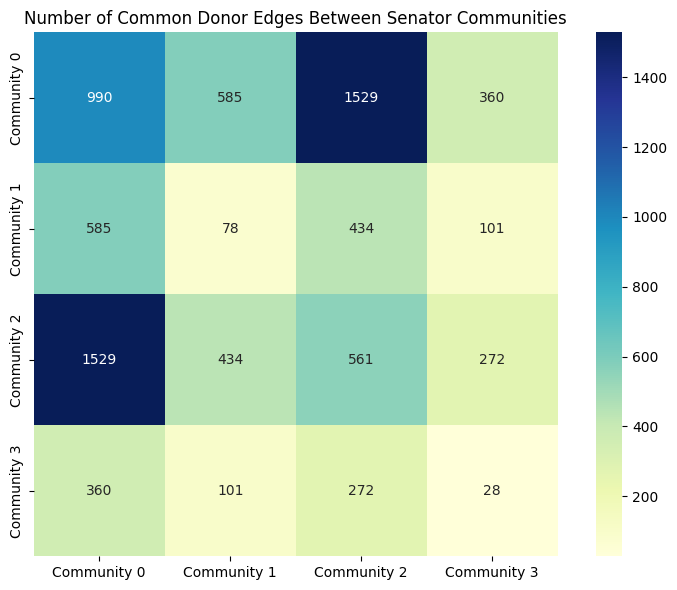

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Sort senator names and map index → community ID
sorted_senators = sorted(df['Senator'].unique())
senator_index_to_community = {}

for community_id, community in enumerate(detected_senator_communities):
    for senator_index in community:
        senator_index_to_community[senator_index] = community_id

num_communities = len(detected_senator_communities)

# Step 2: Count number of nonzero edges between communities
community_edge_counts = np.zeros((num_communities, num_communities), dtype=int)

n = len(sorted_senators)
for i in range(n):
    for j in range(i + 1, n):  # only upper triangle (no duplicates or self-pairs)
        if senator_proj_matrix[i][j] > 0:
            c_i = senator_index_to_community.get(i)
            c_j = senator_index_to_community.get(j)
            if c_i is not None and c_j is not None:
                community_edge_counts[c_i][c_j] += 1
                if c_i != c_j:
                    community_edge_counts[c_j][c_i] += 1  # mirror it for symmetry

# Step 3: Plot heatmap
heatmap_df = pd.DataFrame(
    community_edge_counts,
    index=[f'Community {i}' for i in range(num_communities)],
    columns=[f'Community {i}' for i in range(num_communities)]
)

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_df, annot=True, fmt='d', cmap='YlGnBu', square=True)
plt.title('Number of Common Donor Edges Between Senator Communities')
plt.tight_layout()
plt.show()
